# Twitter-Bitcoin Correlation Analysis

## 1. Correlation with Sentimental Data & Price of Bitcoin

- Bitcoin 가격과 김도영 학우가 만든 전처리기, 감성분석기를 이용해 상관관계를 확인하기 전 데이터에 대한 분석을 진행하였습니다. 

### 1.1 필요한 라이브러리 import

In [1]:
# nltk 활용을 위한 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimjuwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from sentimentalAnalysis import sentimental_analysis
import matplotlib.pyplot as plt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from coincrawler import coin_crawl_his
from data_pipeline import coin_data_pipeline
from data_concat import data_concat
from Greed_Fear_Model import Greed_Fear_Model
import statsmodels.api as sm 
import numpy as np

### 1.2 필요한 데이터 로드 

- Bitcoin_tweet.csv 파일을 로드하고 해당 어트리뷰트는 무엇인지 데이터 수 등 파악
- 'text'라는 컬럼부분을 'tweet'으로 바꿈 
- 데이터를 파악하여 칼럼 값에 결측치가 있는 것을 확인하였음. 결측치가 있을 경우 학습이 안될 가능성이 높고, compile이 되지 않을 가능성이 높으므로 해당값을 제거해주는 방식으로 코딩을 진행하였음

## SOL 데이터 모델링 ( Target  : 'target_close')

In [3]:
train_data = pd.read_csv('twitter_dataset.csv').drop('Unnamed: 0',axis=1)
train_data

,close,count,flair_avg,flair_sum,follower_number_avg,follower_number_sum,following_number_avg,following_number_sum,high,likes_avg,...,target_market cap,target_open,target_vol,textblob_avg,textblob_sum,tweet_length,vader_avg,vader_sum,vol,date
0,-0.834088,-1.162789,-1.056379,-0.376469,-1.072859,-1.072859,1.227984,-1.060005,-0.927379,-0.137619,...,-0.779133,-0.834254,1.662144,-1.601728,-1.138748,-1.182562,-1.535078,-1.119193,1.033283,2021-02-05
1,-0.711882,-1.068993,-1.235151,-0.545274,-1.015768,-1.015768,-0.314583,-1.018168,-0.649014,-0.338438,...,-0.818141,-0.713469,1.357839,-1.158831,-1.069072,-1.122227,-1.415935,-1.068959,1.734918,2021-02-06
2,-0.751383,-1.083678,-0.535172,-0.391719,-1.045025,-1.045025,-0.100330,-1.021493,-0.779103,-0.147790,...,-0.028745,-0.752944,3.236651,0.142859,-1.037176,-1.127292,-1.392941,-1.075469,1.413791,2021-02-07
3,0.043167,-0.928713,-0.736080,-0.597182,-0.812995,-0.812995,-0.328227,-0.904136,-0.079952,0.256561,...,0.002283,0.039924,2.732172,-1.227601,-0.980785,-1.033034,-1.117558,-0.975328,3.396462,2021-02-08
4,0.074177,-1.005514,-0.710590,-0.507052,-0.917393,-0.917393,-0.082401,-0.952532,0.111223,0.417199,...,-0.166597,0.070861,2.496644,-1.380534,-1.037433,-1.078297,-1.222505,-1.025534,2.864096,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.541904,1.894998,0.335520,-0.157058,1.384053,1.384053,0.067868,1.687080,-0.634168,0.533864,...,-0.441939,-0.542038,-0.741982,0.667252,1.909231,1.813030,0.217156,1.598256,-0.338946,2022-04-18
138,-0.468197,1.993235,0.698866,1.070373,1.490971,1.490971,-0.206844,1.573259,-0.561233,-0.093481,...,-0.455878,-0.468862,-0.610535,1.432367,2.449276,2.012100,0.723046,2.056435,-0.802109,2022-04-19
139,-0.482182,-0.619079,0.618422,-0.029962,-0.579661,-0.579661,-0.447369,-0.668518,-0.513079,0.493986,...,-0.549225,-0.483009,-0.215970,0.869339,-0.540314,-0.624177,-0.013668,-0.636935,-0.663395,2022-04-20
140,-0.574462,0.516362,0.138831,-0.553187,0.701472,0.701472,-0.715335,0.120478,-0.431578,0.770656,...,-0.635999,-0.574881,-0.600496,0.361420,0.456422,0.489720,-0.174005,0.233722,-0.247019,2022-04-21


In [4]:
vader_textblob_solana_train_data = pd.read_csv('vader_textblob_solana_train_data').drop('Unnamed: 0',axis=1)
flair_solana_train_data = pd.read_csv('flair_solana_train_data.csv').drop('Unnamed: 0',axis=1)
solana_train_data = pd.read_csv('solana_train_data').drop('Unnamed: 0',axis=1)
vader_textblob_solana_test_data = pd.read_csv('vader_textblob_solana_test_data').drop('Unnamed: 0',axis=1)
flair_solana_test_data = pd.read_csv('flair_solana_test_data.csv').drop('Unnamed: 0',axis=1)
solana_test_data = pd.read_csv('solana_test_data').drop('Unnamed: 0',axis=1)


In [5]:
gfmodel = Greed_Fear_Model(solana_train_data,solana_test_data)

In [6]:
coin =  gfmodel.coin_data_load('solana')

  0%|          | 0/769 [00:00<?, ?it/s]

In [7]:
gfmodel.convert_train_data(vader_textblob_solana_train_data,flair_solana_train_data)
gfmodel.convert_test_data(vader_textblob_solana_test_data,flair_solana_test_data)

(50, 11)
(50, 12)
date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-28,1212,4.6905,0.521167,0.663889,0.073765,4.052856,0.450317,20817,2313.000000,...,98.19,1.307132e+09,3.276495e+10,2022-04-29,98.18,98.57,92.88,94.01,1.234575e+09,3.140035e+10
1,2022-04-29,1392,-0.1912,-0.019120,-0.854545,-0.085455,-2.352188,-0.235219,13495,1349.500000,...,94.01,1.234575e+09,3.140035e+10,2022-04-30,94.01,94.93,82.91,85.10,1.293034e+09,2.842272e+10
2,2022-04-30,2231,1.8835,0.104639,4.100000,0.227778,1.556701,0.086483,14732,818.444444,...,85.10,1.293034e+09,2.842272e+10,2022-05-01,85.09,92.43,84.94,89.67,1.426749e+09,2.998642e+10
3,2022-05-01,933,-2.4813,-0.354471,-2.100000,-0.300000,-6.994179,-0.999168,35325,5046.428571,...,89.67,1.426749e+09,2.998642e+10,2022-05-02,89.67,90.69,85.41,87.58,1.265220e+09,2.927111e+10
4,2022-05-02,2097,5.5582,0.370547,0.419444,0.027963,-13.618021,-0.907868,16773,1118.200000,...,87.58,1.265220e+09,2.927111e+10,2022-05-03,87.56,88.69,84.92,85.84,1.011989e+09,2.868998e+10
5,2022-05-03,4034,-1.7846,-0.061538,4.824820,0.166373,-11.452229,-0.394904,8099,279.275862,...,85.84,1.011989e+09,2.868998e+10,2022-05-04,85.84,92.94,85.73,92.77,1.428455e+09,3.100554e+10
6,2022-05-04,446,0.0385,0.009625,0.505682,0.126420,-1.995066,-0.498766,716,179.000000,...,92.77,1.428455e+09,3.100554e+10,2022-05-05,92.77,95.03,81.83,84.60,1.805979e+09,2.828463e+10
7,2022-05-05,1116,-2.8838,-0.360475,0.154167,0.019271,-5.574165,-0.696771,2377,297.125000,...,84.60,1.805979e+09,2.828463e+10,2022-05-06,84.59,84.65,80.47,81.76,1.585082e+09,2.736587e+10
8,2022-05-06,1080,4.0636,0.507950,-0.600000,-0.075000,2.150821,0.268853,8581,1072.625000,...,81.76,1.585082e+09,2.736587e+10,2022-05-07,81.77,82.18,77.88,78.98,1.139093e+09,2.647426e+10
9,2022-05-07,3350,-5.0330,-0.209708,-3.375000,-0.140625,-6.501239,-0.270885,18365,765.208333,...,78.98,1.139093e+09,2.647426e+10,2022-05-08,78.99,79.28,74.53,75.22,1.439701e+09,2.522289e+10


In [8]:
gfmodel.train_normalize()
gfmodel.test_normalize()

,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,likes_sum,...,close,vol,market cap,target_open,target_high,target_low,target_close,target_vol,target_market cap,date
0,-0.451425,1.153589,1.437291,-0.019101,0.294225,1.170601,1.343676,0.375365,0.831257,-0.469167,...,1.213454,-0.664008,1.209414,1.213398,1.156135,1.163699,1.119761,-0.701996,1.117819,2022-04-28
1,-0.331413,-0.171425,-0.216855,-0.718033,-0.873336,0.137267,0.128222,-0.157199,0.082142,-0.350089,...,0.976308,-0.723736,0.975161,0.976646,0.926305,0.633633,0.607152,-0.653097,0.599733,2022-04-29
2,0.227980,0.391700,0.162046,1.562534,1.423598,0.767893,0.698599,-0.067226,-0.330751,0.733520,...,0.470812,-0.675613,0.464006,0.470212,0.768455,0.741560,0.870073,-0.541249,0.871805,2022-04-30
3,-0.637445,-0.793014,-1.243569,-1.291313,-2.446598,-0.611631,-1.226259,1.430601,2.956481,-0.231011,...,0.730084,-0.565541,0.732438,0.730242,0.658592,0.766548,0.749831,-0.676362,0.747347,2022-05-01
4,0.138637,1.389104,0.976151,-0.131618,-0.041645,-1.680264,-1.064384,0.081225,-0.097693,-0.546568,...,0.611511,-0.698509,0.609646,0.610446,0.532312,0.740497,0.649726,-0.888182,0.646234,2022-05-02
5,1.430106,-0.603913,-0.346722,1.896167,0.973317,-1.330854,-0.154900,-0.549676,-0.749951,-0.415582,...,0.512795,-0.906965,0.509885,0.512793,0.800657,0.783561,1.048422,-0.539821,1.049124,2022-05-03
6,-0.962146,-0.109078,-0.128849,-0.091923,0.680344,0.194882,-0.339047,-1.086677,-0.827915,0.953815,...,0.905958,-0.564137,0.907385,0.906245,0.932619,0.576214,0.578387,-0.224035,0.575706,2022-05-04
7,-0.515432,-0.902263,-1.261949,-0.253725,-0.105384,-0.382539,-0.690108,-0.965865,-0.736073,-0.558476,...,0.442446,-0.253366,0.440301,0.441824,0.277226,0.503908,0.414996,-0.408808,0.415848,2022-05-05
8,-0.539435,0.983433,1.396826,-0.600866,-0.796672,0.863743,1.021939,-0.514618,-0.133127,-0.487029,...,0.281322,-0.435204,0.282582,0.281718,0.121271,0.366208,0.255058,-0.781863,0.260715,2022-05-06
9,0.974058,-1.485608,-0.800361,-1.878193,-1.277901,-0.532105,0.064986,0.197019,-0.372141,0.054776,...,0.123603,-0.802335,0.129524,0.123883,-0.061835,0.188101,0.038738,-0.530415,0.042985,2022-05-07


In [9]:
from data_concat import data_concat

d_concat = data_concat()
gfmodel.normed_train_data = d_concat.concat([gfmodel.normed_train_data, train_data])

  0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
gfmodel.make_model()

In [11]:
result = gfmodel.predict()
result

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:417: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result['correct'] = pd.Series()
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['correct'].iloc[i] =True


,target_close,predict_close,date,vol,close,target_date,Greed_Fear_Score,difference,correct
0,92.324524,94.01,2022-04-28,1.307132e+09,98.19,2022-04-29,-42.570527,-5.865476,True
1,90.965003,85.10,2022-04-29,1.234575e+09,94.01,2022-04-30,-94.777151,-3.044997,True
2,82.548565,89.67,2022-04-30,1.293034e+09,85.10,2022-05-01,53.701528,-2.551435,False
3,87.734189,87.58,2022-05-01,1.426749e+09,89.67,2022-05-02,-23.307684,-1.935811,True
4,80.553336,85.84,2022-05-02,1.265220e+09,87.58,2022-05-03,-19.867550,-7.026664,True
5,83.379154,92.77,2022-05-03,1.011989e+09,85.84,2022-05-04,80.731594,-2.460846,False
6,88.999747,84.60,2022-05-04,1.428455e+09,92.77,2022-05-05,-88.067263,-3.770253,True
7,83.794477,81.76,2022-05-05,1.805979e+09,84.60,2022-05-06,-33.569740,-0.805523,True
8,76.846561,78.98,2022-05-06,1.585082e+09,81.76,2022-05-07,-34.001957,-4.913439,True
9,78.449496,75.22,2022-05-07,1.139093e+09,78.98,2022-05-08,-47.606989,-0.530504,True


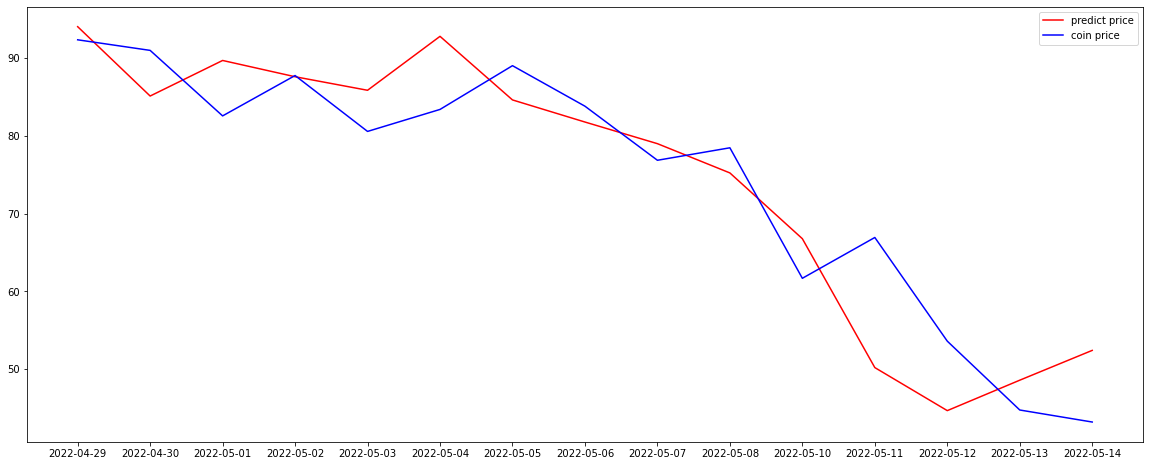

In [12]:
gfmodel.visualize()

In [13]:
result.to_csv('SOL_result_data')
gfmodel.save_csv('SOL_Visulize_data.csv')